# Face Classification

In [ ]:
#default_exp nb_06

In [ ]:
from fastai.core import *
from fastai.vision import *
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01a import *
from kgl_deepfake.nb_02a import *
from kgl_deepfake.nb_03 import *

### Data

In [ ]:
SOURCE = Path('../data/')

In [ ]:
src = ImageList.from_folder(SOURCE).split_by_folder(train='dfdc_train_part_0', valid='train_sample_faces')

In [ ]:
lab = r'([A-Z]+).png$'

In [ ]:
bs, sz = 32, 128

In [ ]:
def get_data(bs,size):
    data = (src.label_from_re(lab)
           .transform(get_transforms(), size=size)
           .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [ ]:
data = get_data(bs, sz)

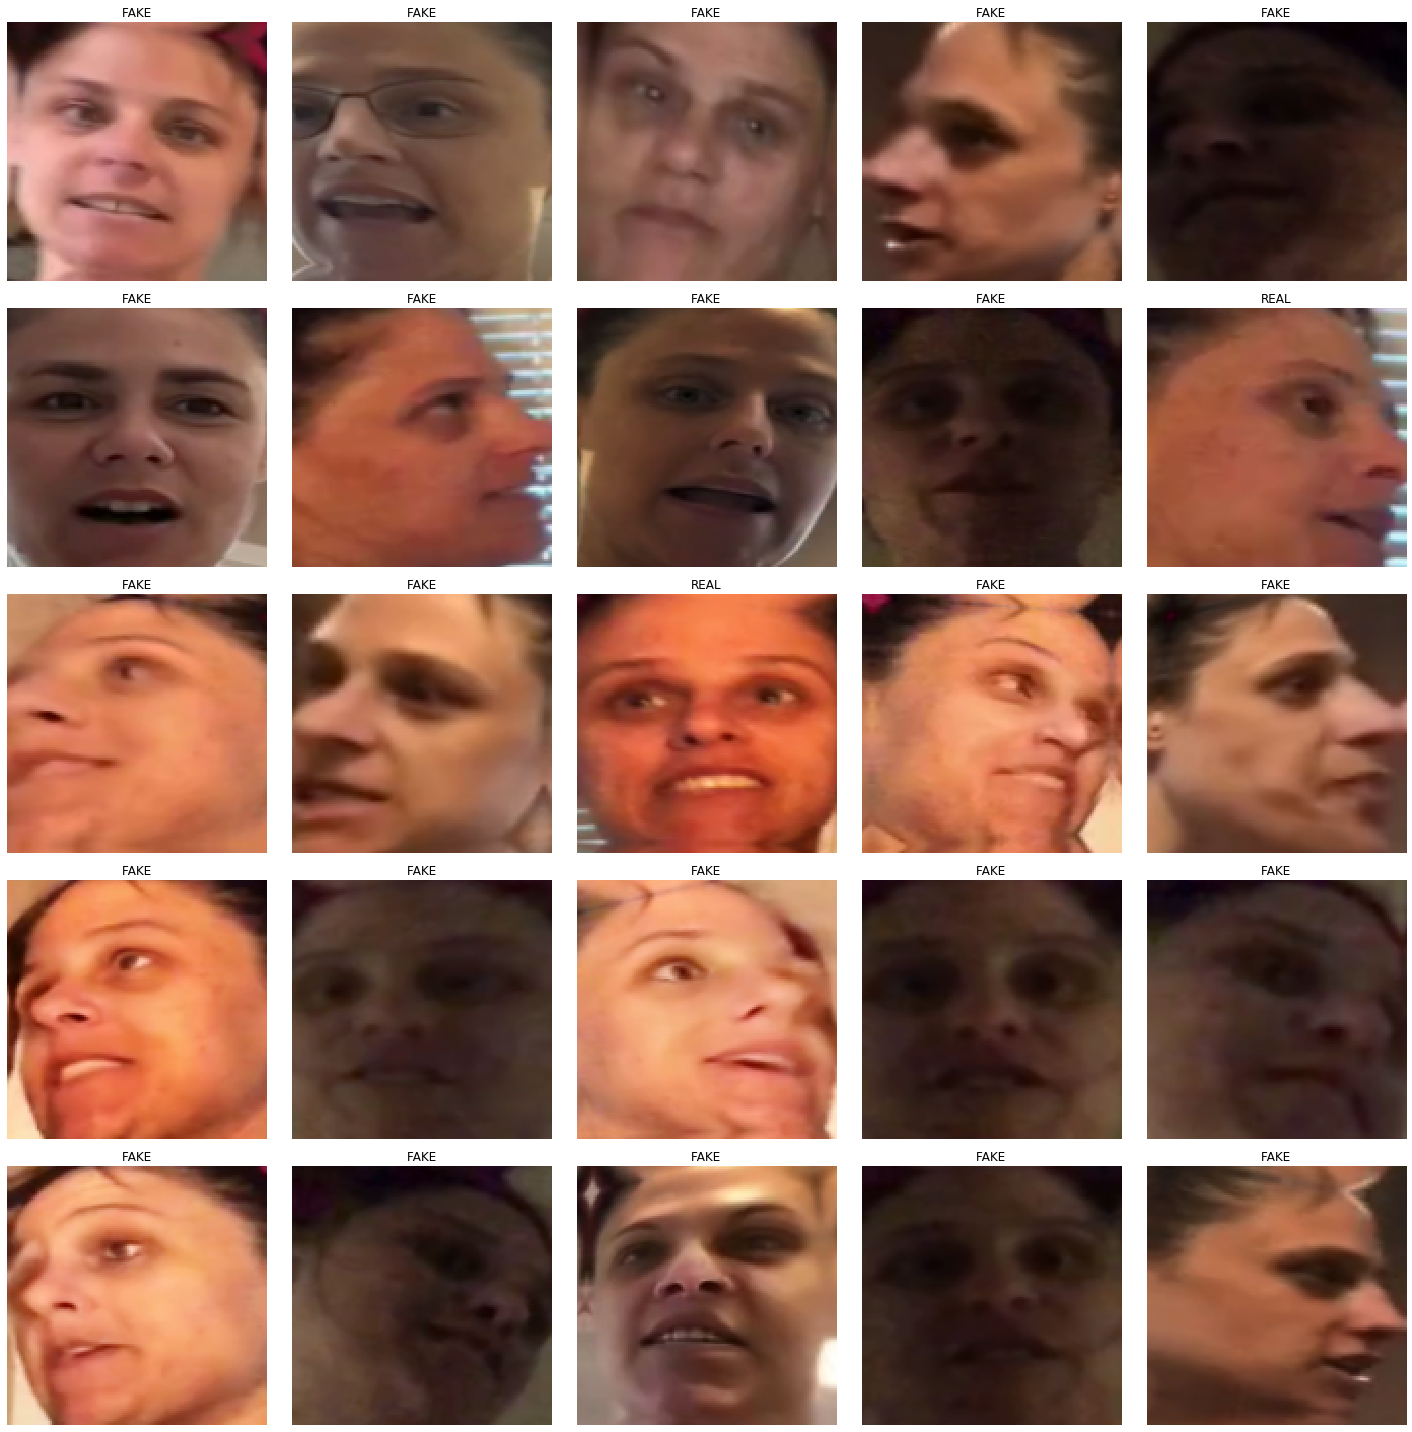

In [ ]:
data.show_batch()

### Model

In [ ]:
net = MesoNet()

In [ ]:
from fastai.callbacks.oversampling import OverSamplingCallback

In [ ]:
learn = Learner(data, MesoNet(), metrics=error_rate)

Another trick to deal with class imbalance is to use a **Focal Loss**, which puts more weights on the less represented classes. Its equation is really similar to Cross-Entropy, but with a weighting term:

\begin{equation}
L=-\alpha_{t}\left(1-p_{t}\right)^{\gamma} \log \left(p_{t}\right)
\end{equation}

where α is a prefixed value between 0 and 1 to balance the positive labeled samples and negative labeled samples.

In [ ]:
#export
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduction='elementwise_mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduction = reduction

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction is None:
            return F_loss
        else:
            return torch.mean(F_loss)

In [ ]:
learn.loss_fn = FocalLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


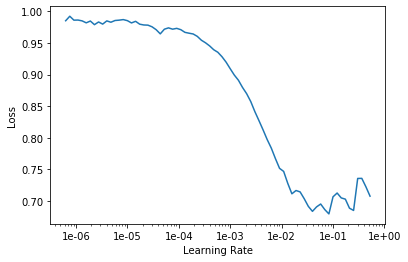

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
epochs, lr = 10, 3e-3

In [ ]:
learn.fit_one_cycle(epochs, lr, callbacks=OverSamplingCallback(learn))

epoch,train_loss,valid_loss,error_rate,time
0,0.691433,0.731326,0.484211,00:02
1,0.675517,1.098527,0.676316,00:02
2,0.668263,0.885854,0.639474,00:02
3,0.660817,0.708564,0.444737,00:02
4,0.630918,1.090749,0.507895,00:02
5,0.611400,0.897636,0.460526,00:02
6,0.610208,0.832560,0.478947,00:02
7,0.583713,0.897389,0.484211,00:02
8,0.555756,0.906482,0.492105,00:02
9,0.555607,0.825771,0.486842,00:02


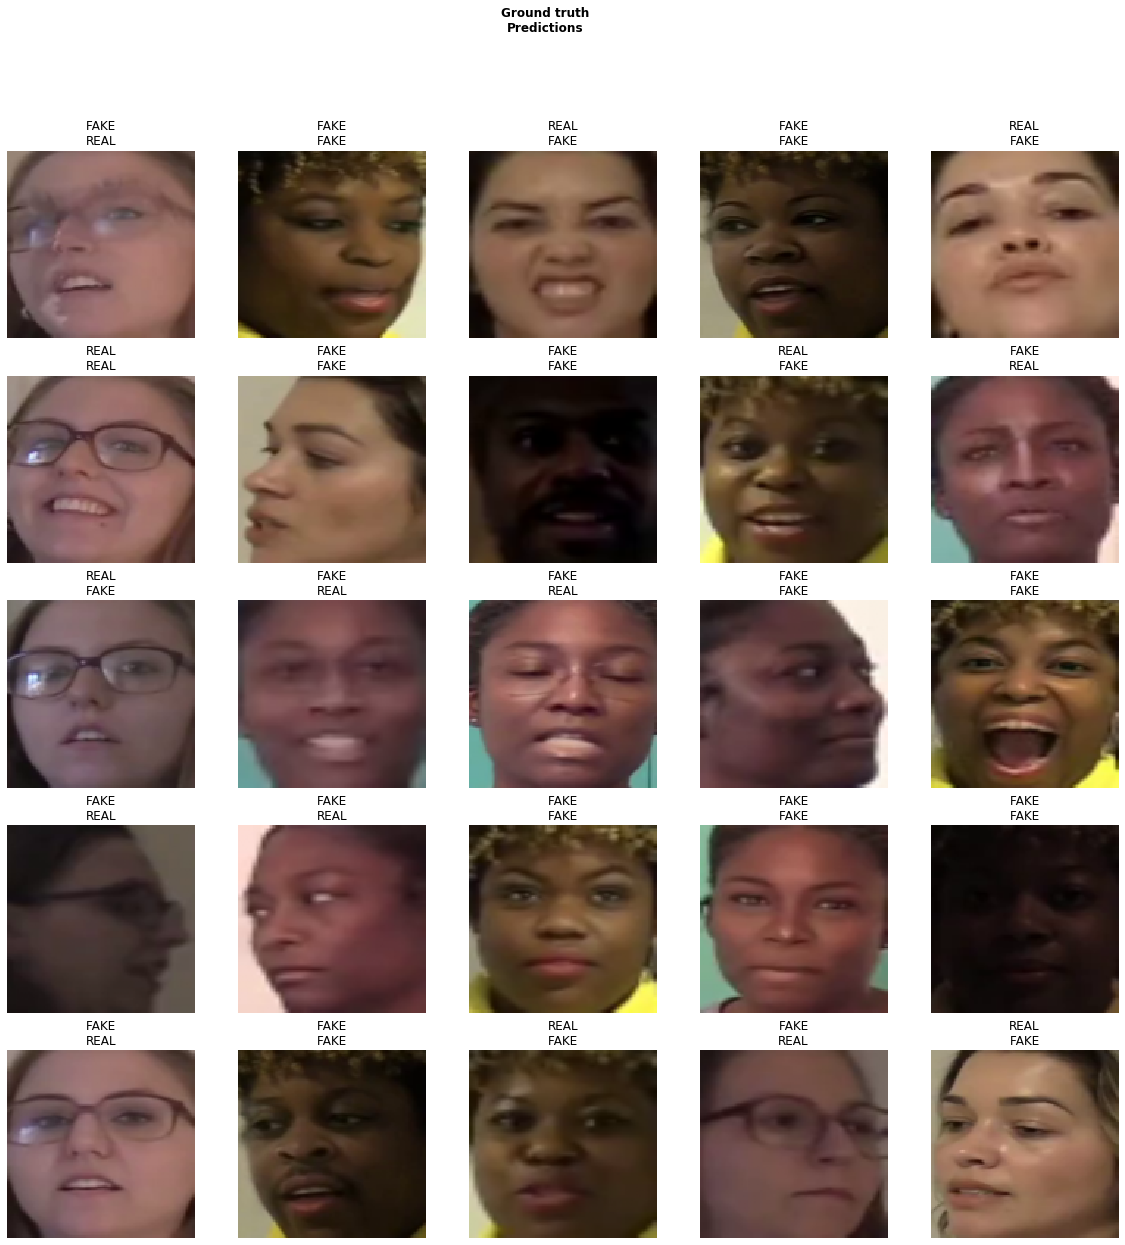

In [ ]:
learn.show_results()

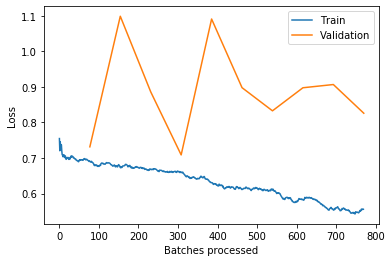

In [ ]:
learn.recorder.plot_losses()

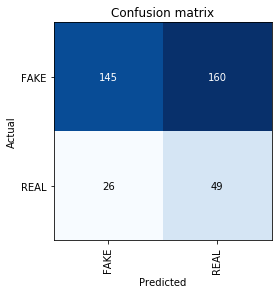

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Fin

In [ ]:
from nbdev.export import *

In [ ]:
notebook2script()

Converted 00_lookatdata.ipynb.
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
This cell doesn't have an export destination and was ignored:
e
Converted 01_face_recog.ipynb.
Converted 01a_face_extraction.ipynb.
Converted 02_face_extraction.ipynb.
Converted 02a_create_faceimage_dataset.ipynb.
Converted 02bis_Create_Dataset-Copy1.ipynb.
Converted 02bis_Create_Dataset.ipynb.
Converted 03_mesonet.ipynb.
Converted 04_Baseline_Classification.ipynb.
Converted 05_Class_Imbalance.ipynb.
This cell doesn't have an export destination and was ignored:
e
Converted 06_Focal_Loss.ipynb.
